## Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load datasets

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
def visualize_cat_variable(data, col, hue, title):
    sns.countplot(data, x=col, hue=hue)
    plt.title(title)
    plt.show()

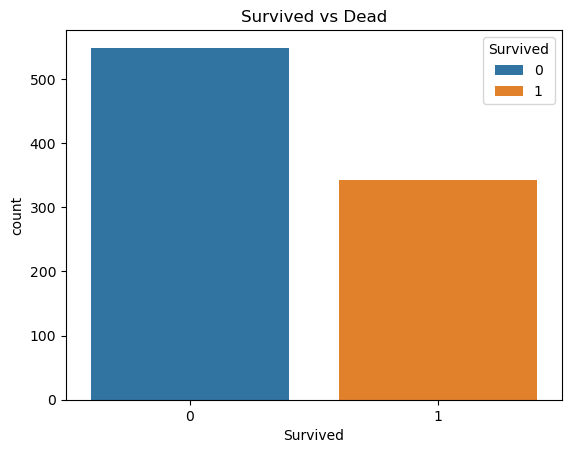

In [11]:
visualize_cat_variable(train, 'Survived', 'Survived', 'Survived vs Dead')

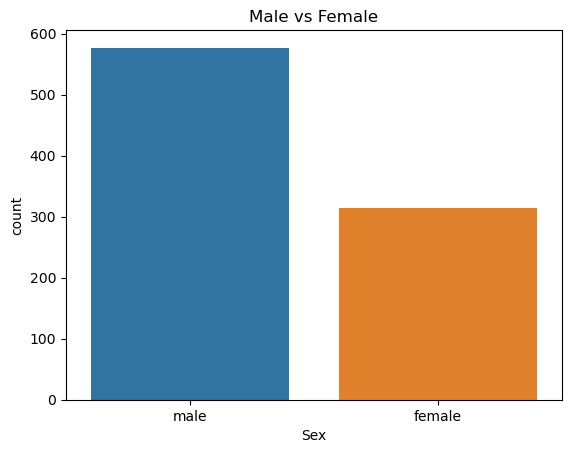

In [12]:
visualize_cat_variable(train, 'Sex', 'Sex', 'Male vs Female')

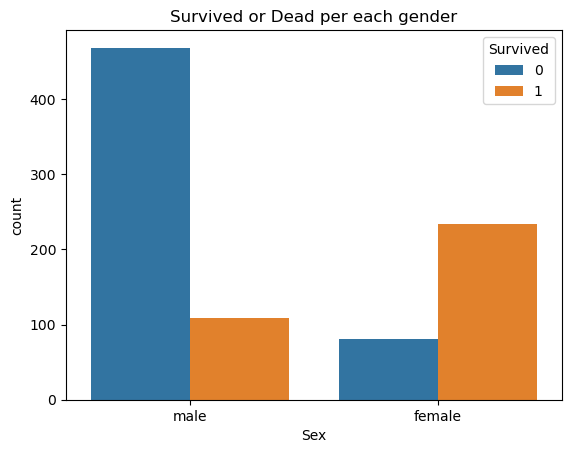

In [13]:
visualize_cat_variable(train, 'Sex', 'Survived', 'Survived or Dead per each gender')

In [14]:
num_male_sv = len(train[(train['Sex'] == 'male') & (train['Survived'] == 1)])
num_male_tol = len(train[(train['Sex'] == 'male')])

num_female_sv = len(train[(train['Sex'] == 'female') & (train['Survived'] == 1)])
num_female_tol = len(train[(train['Sex'] == 'female')])

print(f'{round(num_male_sv/num_male_tol * 100, 2)}% number of males survived')
print(f'{round(num_female_sv/num_female_tol * 100, 2)}% number of females survived')

18.89% number of males survived
74.2% number of females survived


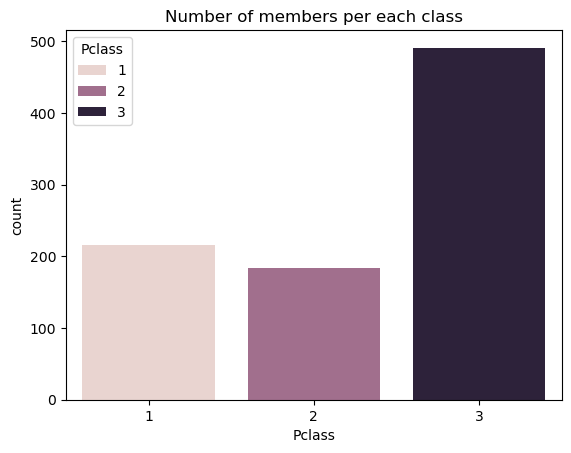

In [15]:
visualize_cat_variable(train, 'Pclass', 'Pclass', 'Number of members per each class')

Thấy được ở class hạng 3 thì tỉ lệ tử vong cao hơn.

Text(0.5, 1.0, 'Survived or Dead by Pclass')

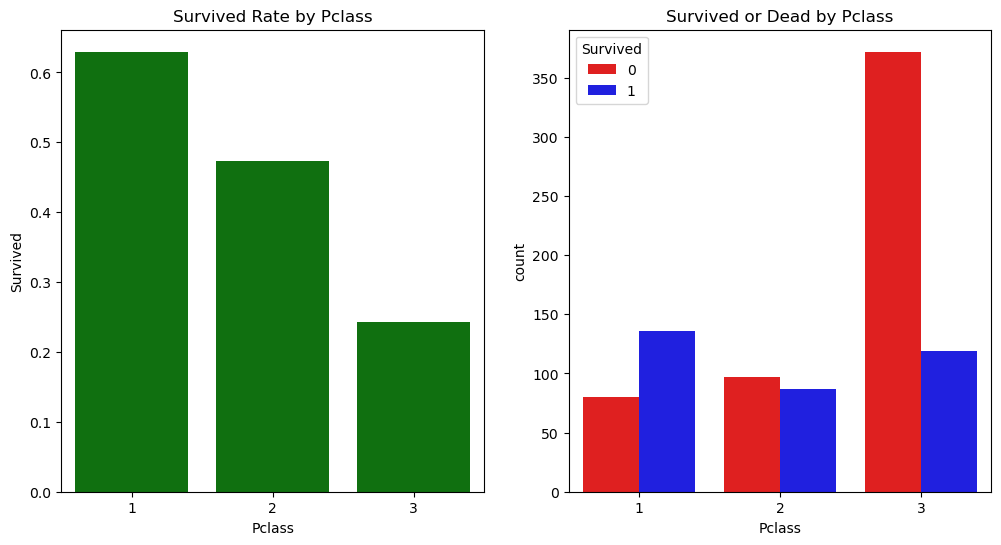

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=train, x='Pclass', y='Survived', palette=['green'], ci=None, ax=ax[0])
ax[0].set_title('Survived Rate by Pclass')
sns.countplot(data=train, x='Pclass', hue='Survived', palette=['red', 'blue'], ax=ax[1])
ax[1].set_title('Survived or Dead by Pclass')

In [18]:
train.groupby(['Pclass', 'Sex'])['Survived'].mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

Text(0.5, 1.0, 'Survival rate by Pclass and Sex')

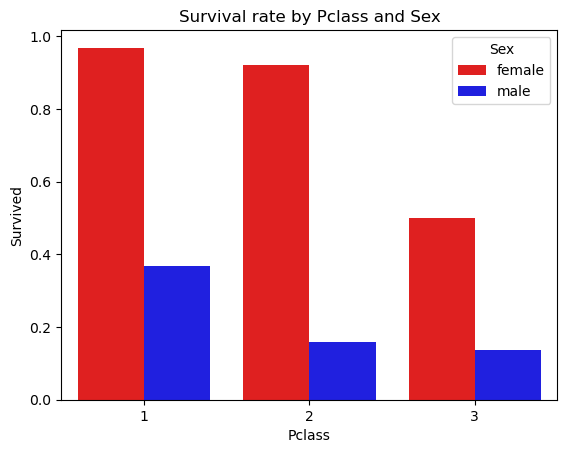

In [19]:
sns.barplot(data=train, x='Pclass', y='Survived', hue='Sex', palette=['red', 'blue'], ci=None)
plt.title('Survival rate by Pclass and Sex')

In [20]:
train['Age'].value_counts().head(10)

Age
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: count, dtype: int64

<Axes: title={'center': 'Age distribution for the two subpopulations'}, xlabel='Age', ylabel='Density'>

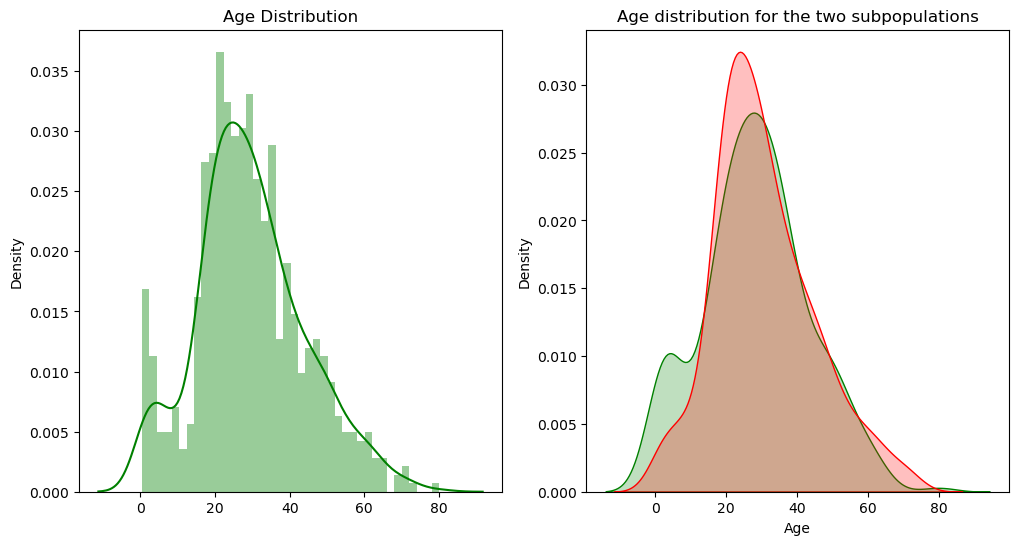

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.distplot(x=train['Age'], bins=40, kde=True, ax=ax[0], color='g')
ax[0].set_title('Age Distribution')

ax[1].set_title('Age distribution for the two subpopulations')
sns.kdeplot(train['Age'].loc[train['Survived'] == 1], color='green', ax=ax[1], shade=True, label='Survived')
sns.kdeplot(train['Age'].loc[train['Survived'] == 0], color='red', ax=ax[1], shade=True, label='Not Survived')
# ax[1].set_legends()

In [22]:
survived_df = train[train['Survived'] == 1]
dead_df = train[train['Survived'] == 0]

In [23]:
survived_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
dead_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Text(0.5, 1.0, 'Dead members by class and gender')

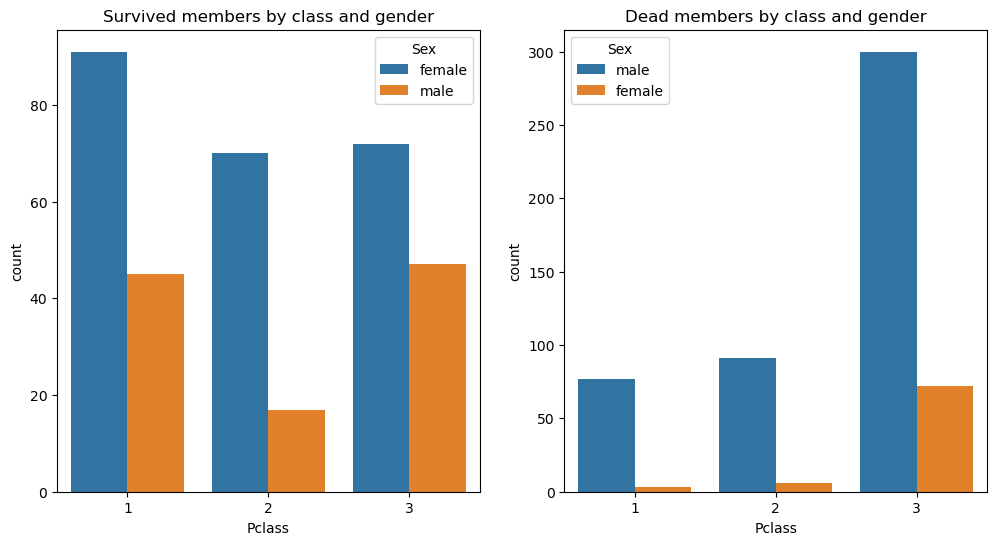

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(survived_df, x='Pclass', hue='Sex', ax=ax[0])
ax[0].set_title('Survived members by class and gender')
sns.countplot(dead_df, x='Pclass', hue='Sex', ax=ax[1])
ax[1].set_title('Dead members by class and gender')

Giá vé (Fare) càng cao thì Pclass càng cao cấp hơn.

<Axes: >

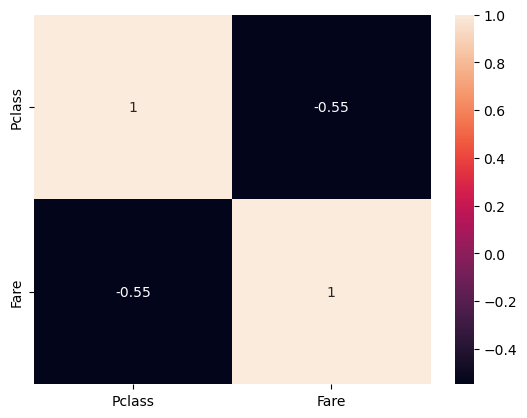

In [27]:
sns.heatmap(train[['Pclass', 'Fare']].corr(), annot = True)

Text(0.5, 1.0, 'Fare values for 3st class')

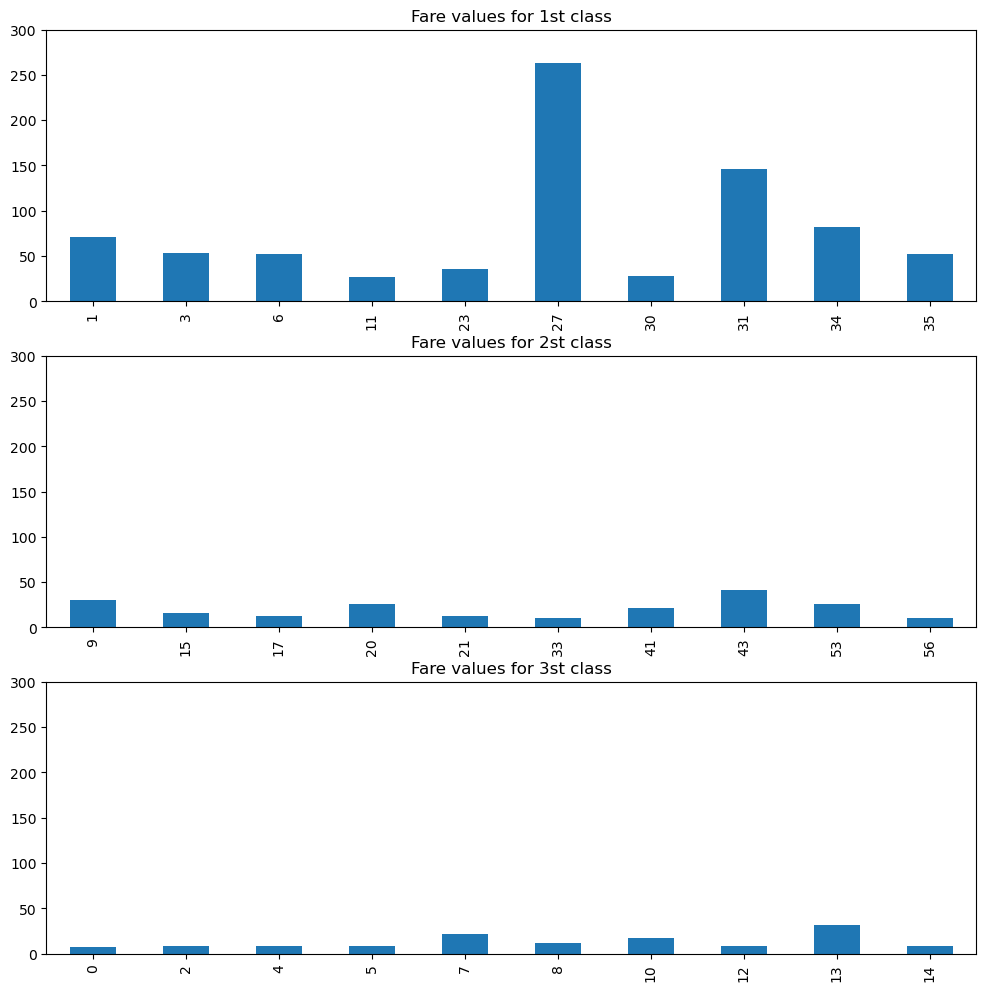

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

train[train['Pclass'] == 1]['Fare'][:10].plot(kind = 'bar', ax=ax[0])
ax[0].set_ylim(0, 300)
ax[0].set_title('Fare values for 1st class')

train[train['Pclass'] == 2]['Fare'][:10].plot(kind = 'bar', ax=ax[1])
ax[1].set_ylim(0, 300)
ax[1].set_title('Fare values for 2st class')

train[train['Pclass'] == 3]['Fare'][:10].plot(kind = 'bar', ax=ax[2])
ax[2].set_ylim(0, 300)
ax[2].set_title('Fare values for 3st class')

In [29]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
train[train['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [31]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
survived_df['Cabin'].unique()

array(['C85', nan, 'C123', 'G6', 'C103', 'D56', 'A6', 'B78', 'D33', 'C52',
       'B28', 'F33', 'C23 C25 C27', 'D10 D12', 'E101', 'F E69', 'D47',
       'C2', 'E33', 'F4', 'F2', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93',
       'C83', 'D35', 'B77', 'C125', 'C99', 'D7', 'B49', 'C106', 'B58 B60',
       'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34',
       'C32', 'D', 'B18', 'E40', 'D37', 'B35', 'E50', 'B96 B98', 'C78',
       'E10', 'A34', 'C104', 'C92', 'D21', 'E12', 'D20', 'B79', 'E25',
       'B73', 'B39', 'B22', 'C70', 'A16', 'E67', 'C101', 'E44', 'C68',
       'E68', 'B41', 'A20', 'D19', 'D9', 'A23', 'B50', 'A26', 'C126',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'E24', 'C90', 'C45',
       'E8', 'B101', 'D45', 'E121', 'D11', 'B3', 'D17', 'B69', 'E49',
       'C47', 'D28', 'E17', 'C50', 'B42', 'C148'], dtype=object)

In [33]:
dead_df['Cabin'].unique()

array([nan, 'E46', 'C23 C25 C27', 'B30', 'C83', 'F G73', 'E31', 'A5',
       'D26', 'C110', 'B58 B60', 'C123', 'B86', 'F2', 'B19', 'A7', 'C49',
       'A32', 'G6', 'C78', 'C87', 'E67', 'B94', 'C118', 'A19', 'D',
       'C22 C26', 'C124', 'C91', 'C2', 'T', 'C128', 'C82', 'E44', 'C111',
       'E38', 'E63', 'A14', 'B37', 'C30', 'C65', 'D46', 'C95', 'B38',
       'C86', 'A10', 'D50', 'D48', 'E58', 'B71', 'C68', 'F G63', 'C46',
       'B22', 'D30', 'E77', 'F38', 'D6', 'B82 B84', 'A36', 'B102', 'A24',
       'B51 B53 B55'], dtype=object)

In [34]:
train.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace = True)
test.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace = True)

In [35]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,NaN,1,2
889,890,1,1,male,26.0,0,0


In [36]:
y_train = train['Survived']
train.drop(columns='Survived', inplace = True)

In [37]:
from sklearn.impute import SimpleImputer
si_age = SimpleImputer()
si_embarked = SimpleImputer(strategy='most_frequent')

X_train_age = si_age.fit_transform(train[['Age']])
X_test_age = si_age.fit_transform(test[['Age']])

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe_sex = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(train[['Sex']])
X_test_sex = ohe_sex.fit_transform(test[['Sex']])

In [39]:
X_train_transformed = np.concatenate((train.drop(columns=['Sex', 'Age']), X_train_sex, X_train_age), axis=1)

X_test_transformed = np.concatenate((test.drop(columns=['Sex', 'Age']), X_test_sex, X_test_age), axis=1)

X_train_transformed.shape

(891, 7)

<Axes: >

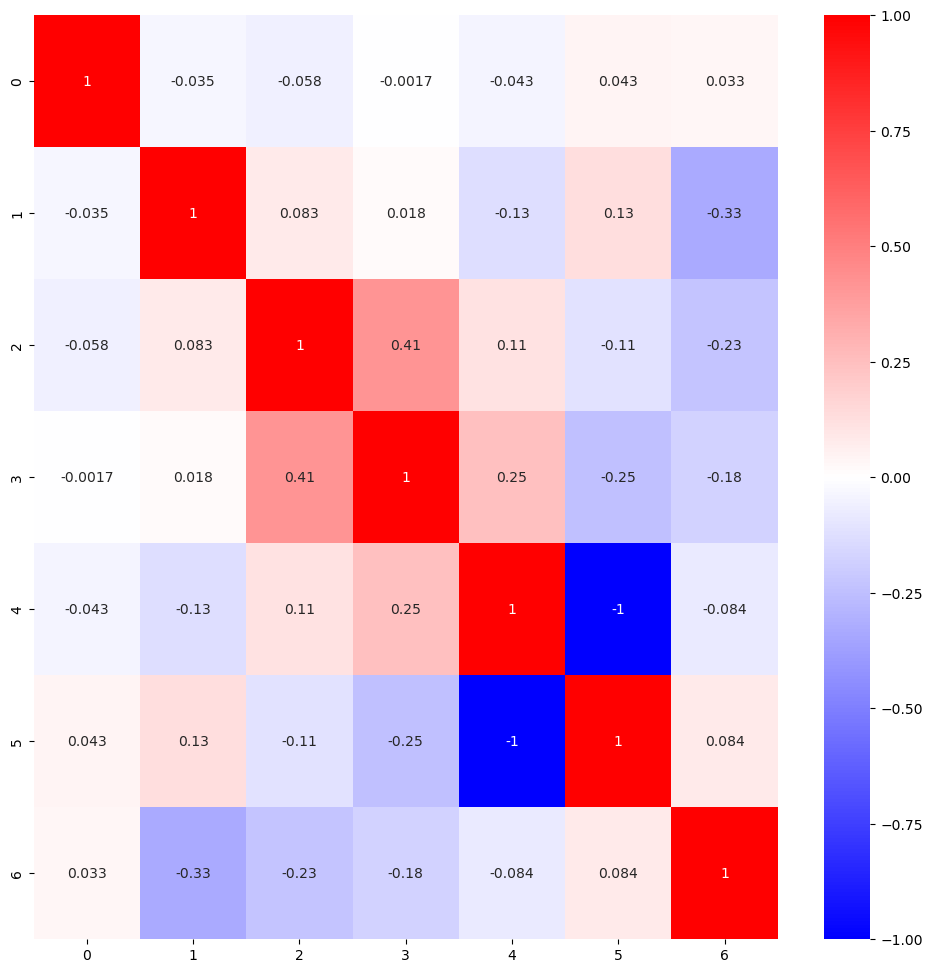

In [40]:
plt.figure(figsize=(12, 12))
sns.heatmap(pd.DataFrame(X_train_transformed).corr(), annot = True, cmap='bwr')

In [41]:
X_train_transformed = X_train_transformed[:, 1:]
X_test_transformed = X_test_transformed[:, 1:]

## Training models

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

lg_clf = LogisticRegression()
lg_clf_param = {'penalty':['11','l2','elasticnet'], 'C':range(1, 10)}

svm_clf = SVC()
svm_clf_param = {'C':range(1, 10), 'kernel':['rbf', 'poly']}

nb_clf = MultinomialNB()
nb_clf_param = {'alpha':range(10)}

knn_clf = KNeighborsClassifier()
knn_clf_param = {'n_neighbors':range(1, 10)}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### Train and fine tune Logistic Regression

In [45]:
search = GridSearchCV(estimator=lg_clf, param_grid=lg_clf_param, cv=kfold)
search.fit(X_train_transformed, y_train)
search.best_params_

{'C': 1, 'penalty': 'l2'}

In [46]:
lg_clf = LogisticRegression()

### Train and fine tune SVM

In [48]:
search = GridSearchCV(estimator=svm_clf, param_grid=svm_clf_param, cv=kfold)
search.fit(X_train_transformed, y_train)
search.best_params_

{'C': 6, 'kernel': 'rbf'}

In [49]:
svm_clf = SVC(C=6, kernel='rbf')

### Train and fine tune Multinomial Naive Bayes

In [51]:
search = GridSearchCV(estimator=nb_clf, param_grid=nb_clf_param, cv=kfold)
search.fit(X_train_transformed, y_train)
search.best_params_

{'alpha': 0}

In [52]:
nb_clf = MultinomialNB()

### Train and fine tune K Nearest Neighbors

In [54]:
search = GridSearchCV(estimator=knn_clf, param_grid=knn_clf_param, cv=kfold)
search.fit(X_train_transformed, y_train)
search.best_params_

{'n_neighbors': 5}

In [55]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

### Voting

In [57]:
from sklearn.ensemble import VotingClassifier

models = [
    ('logreg', lg_clf),
    ('svc', SVC(probability=True, C=6, kernel='rbf')),
    ('naive', nb_clf),
    ('knn', knn_clf)
]

voting_model = VotingClassifier(estimators=models, voting='soft')
voting_model.fit(X_train_transformed, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('svc', SVC(C=6, probability=True)),
                             ('naive', MultinomialNB()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [58]:
voting_model.score(X_train_transformed, y_train)

0.8103254769921436

In [59]:
cross_val_score(voting_model, X_train_transformed, y_train, cv=kfold)

array([0.83333333, 0.78651685, 0.79775281, 0.80898876, 0.76404494,
       0.82022472, 0.78651685, 0.80898876, 0.84269663, 0.82022472])

In [108]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

bg_clf = BaggingClassifier()

In [128]:
'23' in '23'

True

In [148]:
foo = 'Tung'
foo[::2]

'Tn'

In [176]:
a = [1,2,3]
sum(a)

6

In [170]:
a.index(2)

1

In [182]:
a = ['123', '434']
' '.join(a) 

'123 434'

In [186]:
a = {1,2,3,4}

In [190]:
a.add(5)

In [194]:
a.

{1}

In [253]:
a = range(10)

In [212]:
b = [i * 2 if i%2 != 1 else i * 100 for i in a]

In [216]:
mat = [[False for i in range(10)] for i in range(10)]

In [218]:
mat

[[False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False]]

In [220]:
b = 1
a = 2 if b == 1 else 3

In [222]:
a

2

In [275]:
b = range(0, 10, 2)

In [281]:
a = [1,2,3,4,5]

In [293]:
list(map(lambda x: 2*x, a))

[2, 4, 6, 8, 10]

In [285]:
def double(i):
    return 2 * i

In [295]:
list(filter(lambda x: x%2==0, a))

[2, 4]

In [297]:
f = lambda x, y: x * y

In [303]:
f(2,3)

6

In [305]:
f = lambda x,y: 2 * x**2 + 4*x*y+5*y**2+x+y

In [309]:
f(1,0)

3

In [315]:
def f1(x):
    if x % 2 == 0:
        return f(x, x/2)
    return f(x,2*x)

In [317]:
f1(1)

33